In [617]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import OLSInfluence


In [618]:
def remove_outliers_zscore(df, columns):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < 3] 
    return df

In [619]:
groundwater_quality_data = pd.read_csv("Copy of District-Level_GWQ_AllYears.csv")
sdp_data = pd.read_csv("sdp_data.csv")
gini_index_data = pd.read_csv("gini.csv")
groundwater_quality_data = groundwater_quality_data.applymap(lambda x: x.upper() if isinstance(x, str) else x)
sdp_data = sdp_data.applymap(lambda x: x.upper() if isinstance(x, str) else x)
gini_index_data = gini_index_data.applymap(lambda x: x.upper() if isinstance(x, str) else x)

merged_data = pd.merge(groundwater_quality_data, sdp_data, on=['state', 'year'], how='inner')

merged_data = pd.merge(merged_data, gini_index_data, on='district', how='inner')

merged_data.to_csv("merged_data.csv", index=False)


C:\Users\anous\AppData\Local\Temp\ipykernel_21076\4258909966.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  groundwater_quality_data = groundwater_quality_data.applymap(lambda x: x.upper() if isinstance(x, str) else x)
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\4258909966.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sdp_data = sdp_data.applymap(lambda x: x.upper() if isinstance(x, str) else x)
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\4258909966.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  gini_index_data = gini_index_data.applymap(lambda x: x.upper() if isinstance(x, str) else x)


Applying simple OLS

In [620]:
merged_data = pd.read_csv("merged_data.csv")
merged_data.dropna(subset=['sulfate', 'SDP_NORM'], inplace=True)
X = merged_data['SDP_NORM']
y = merged_data['sulfate']
X = sm.add_constant(X)
model = sm.OLS(y, X, missing='drop').fit()

y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE):", mse)
print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())

Mean Squared Error (MSE): 15876.355323791742
R-squared: 0.0002541352448525158
F-statistic: 1.393777755577276

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.394
Date:                Sat, 27 Apr 2024   Prob (F-statistic):              0.238
Time:                        21:38:41   Log-Likelihood:                -34310.
No. Observations:                5485   AIC:                         6.862e+04
Df Residuals:                    5483   BIC:                         6.864e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------

b) Plotting the graphs for residuals

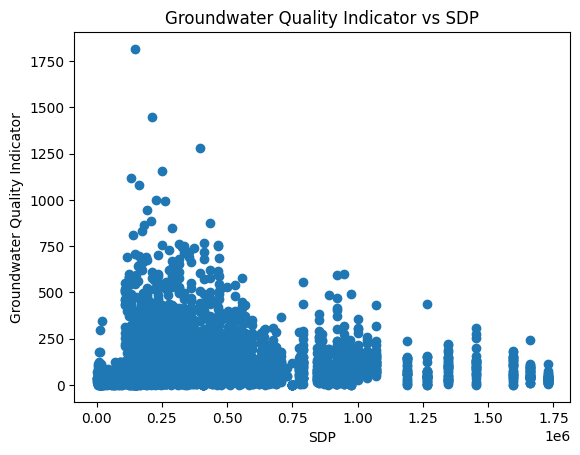

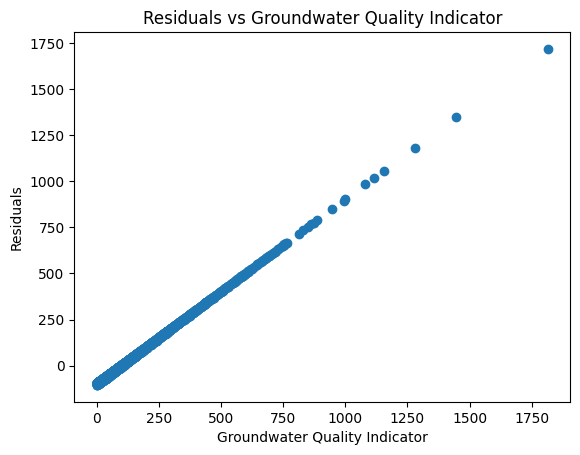

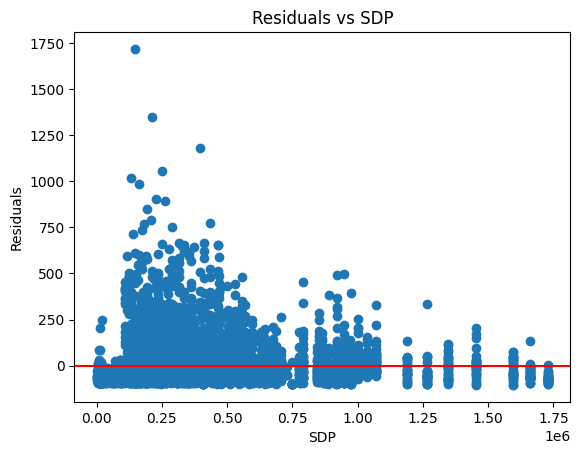

In [621]:
residuals = model.resid
# Scatter plot of  Groundwater Quality Indicator vs SDP
plt.scatter(X['SDP_NORM'],y)
plt.ylabel('Groundwater Quality Indicator')
plt.xlabel('SDP')
plt.title('Groundwater Quality Indicator vs SDP')
plt.show()
# Scatter plot of residuals vs Groundwater Quality Indicator
plt.scatter(y, residuals)
plt.xlabel('Groundwater Quality Indicator')
plt.ylabel('Residuals')
plt.title('Residuals vs Groundwater Quality Indicator')
plt.show()

# Construct a plot of residuals vs SDP
plt.scatter(X['SDP_NORM'], residuals)
plt.xlabel('SDP')
plt.ylabel('Residuals')
plt.title('Residuals vs SDP')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

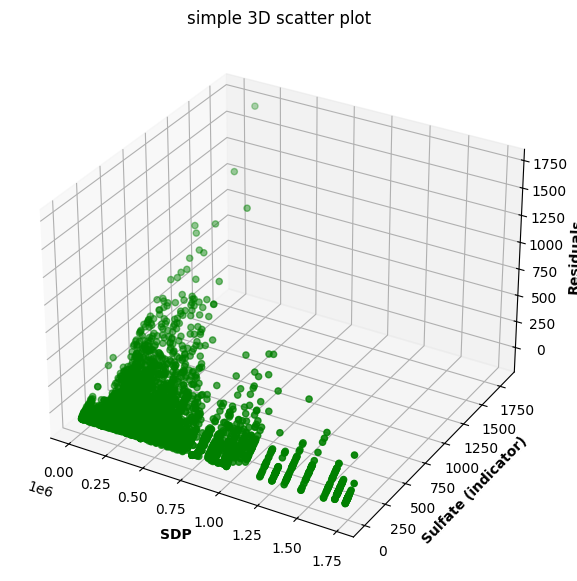

In [622]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X['SDP_NORM'],y,residuals, color = "green")
plt.title("simple 3D scatter plot")
plt.title("simple 3D scatter plot")
ax.set_xlabel('SDP', fontweight ='bold') 
ax.set_ylabel('Sulfate (indicator)', fontweight ='bold') 
ax.set_zlabel('Residuals', fontweight ='bold')
 
# show plot
plt.show()

c) Plotting Histogram

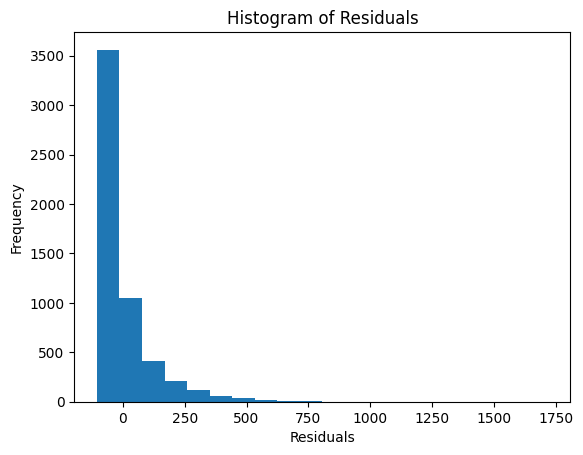

Sum of residuals: -3.1300828595703933e-10


In [623]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
print("Sum of residuals:", sum(residuals))

d) Applying Kuznets Curve Equation

In [624]:
merged_data.dropna(subset=['sulfate', 'SDP_NORM'], inplace=True)
X = merged_data[['SDP_NORM', 'ginivalue']]
X['SDP_sq'] = X['SDP_NORM'] ** 2
X['SDP_cube'] = X['SDP_NORM'] ** 3
X = sm.add_constant(X)
y = merged_data['sulfate']
model = sm.OLS(y, X,missing='drop').fit()
y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE):", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())


Mean Squared Error (MSE): 15616.053219832274
R-squared: 0.017596937085612385
F-statistic: 48.13886499629604

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     48.14
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           1.90e-21
Time:                        21:38:44   Log-Likelihood:                -33596.
No. Observations:                5378   AIC:                         6.720e+04
Df Residuals:                    5375   BIC:                         6.722e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

C:\Users\anous\AppData\Local\Temp\ipykernel_21076\250540842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_sq'] = X['SDP_NORM'] ** 2
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\250540842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_cube'] = X['SDP_NORM'] ** 3


In [625]:
# Summary statistics table
summary_stats = merged_data.describe()
print(summary_stats)

              year      sulfate     arsenic    carbonate      calcium  \
count  5485.000000  5485.000000  350.000000  4926.000000  5466.000000   
mean   2009.913947    98.185657    0.404105     6.859500    63.088573   
std       5.510208   126.028913    2.655933    15.270688    38.177040   
min    2000.000000     0.000000    0.000000     0.000000     0.000000   
25%    2005.000000    24.200001    0.000000     0.000000    36.000000   
50%    2010.000000    52.923077    0.000000     0.000000    57.456282   
75%    2015.000000   122.296300    0.000000     6.638393    82.289169   
max    2018.000000  1815.000000   31.943499   207.000000   493.000000   

          chloride  electricalconductivity     fluorine         iron  \
count  5255.000000             5484.000000  5392.000000  2290.000000   
mean    205.401508             1291.870633     0.733803     0.720329   
std     244.646703              986.266466     0.752534     1.139663   
min       7.000000               31.000000     0.00000

Checking number of influential instructions

In [626]:
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance[0]
threshold = 4 / len(X)
influential_indices = cook_distance > threshold
num_influential = sum(influential_indices)
print("Number of influential observations:", num_influential)


Number of influential observations: 120


Checking number of outliers

In [627]:
z_scores = np.abs((residuals - residuals.mean()) / residuals.std())
threshold = 3
outliers=z_scores > threshold
num_outliers = sum(outliers)
print("Number of outliers:", num_outliers)

Number of outliers: 120


Applying Outlier detection and influential values detection

In [628]:
def preprocessing(merged_data, cols, threshold):
    for col in cols:
        z_scores = np.abs((merged_data[col] - merged_data[col].mean()) / merged_data[col].std())
        merged_data = merged_data[z_scores < threshold]

    # X = merged_data[['SDP_NORM', 'ginivalue']]
    # X['SDP_sq'] = X['SDP_NORM'] ** 2
    # X['SDP_cube'] = X['SDP_NORM'] ** 3
    # X = sm.add_constant(X)
    # y = merged_data['sulfate']
    # model = sm.OLS(y, X).fit()

    # influence = model.get_influence()
    # cook_distance = influence.cooks_distance[0]
    # threshold = 4 / len(X)
    # merged_data = merged_data[cook_distance < threshold]
    return merged_data

a) for simple OLS

In [629]:
merged_data = pd.read_csv("merged_data.csv")
X = merged_data['SDP_NORM']
print("original:",len(X))
# Drop rows with missing values in 'sulfate' or 'SDP_NORM' columns
merged_data.dropna(subset=['sulfate', 'SDP_NORM'], inplace=True)
X = merged_data['SDP_NORM']
print("original not null:",len(X))
# Remove outliers using Z-score method
def remove_outliers_zscore(df, columns, threshold):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < threshold]  # Keep values within 3 standard deviations
    return df

# Specify columns for outlier detection
columns_for_outlier_removal = ['sulfate', 'SDP_NORM', 'ginivalue']

# Remove outliers using Z-score method
merged_data = remove_outliers_zscore(merged_data, columns_for_outlier_removal,3)
X = merged_data['SDP_NORM']
print("after outliers:",len(X))
# Fit OLS model
X = merged_data['SDP_NORM']
y = merged_data['sulfate']
X = sm.add_constant(X)
model = sm.OLS(y, X, missing='drop').fit()
y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE) after preprocessing:", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())


original: 9713
original not null: 5485
after outliers: 5105
Mean Squared Error (MSE) after preprocessing: 8421.668299472412
R-squared: 0.00958562185589229
F-statistic: 49.38885118194527

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     49.39
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           2.38e-12
Time:                        21:38:50   Log-Likelihood:                -30315.
No. Observations:                5105   AIC:                         6.063e+04
Df Residuals:                    5103   BIC:                         6.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
              

b) plotting graphs

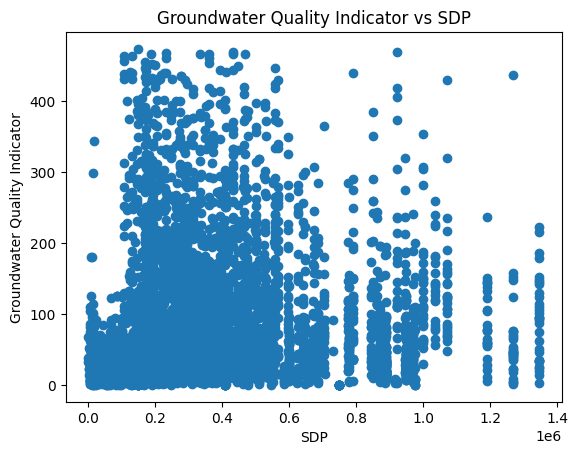

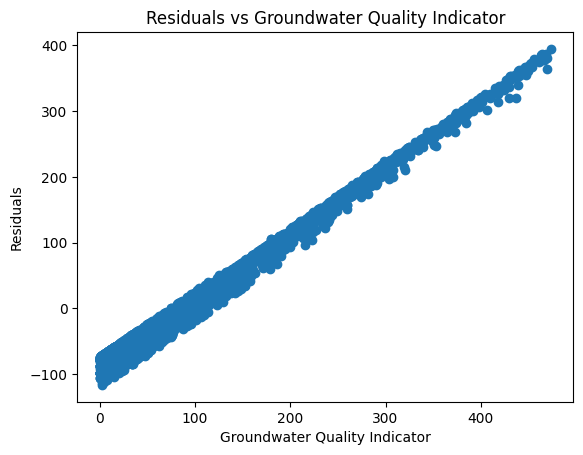

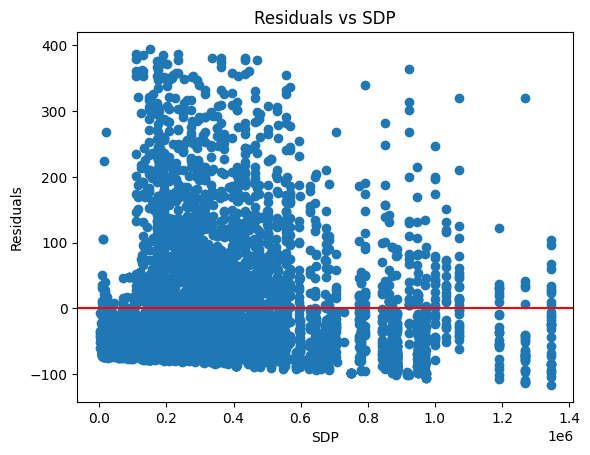

In [630]:
residuals = model.resid
# Scatter plot of  Groundwater Quality Indicator vs SDP
plt.scatter(X['SDP_NORM'],y)
plt.ylabel('Groundwater Quality Indicator')
plt.xlabel('SDP')
plt.title('Groundwater Quality Indicator vs SDP')
plt.show()
# Scatter plot of residuals vs Groundwater Quality Indicator
plt.scatter(y, residuals)
plt.xlabel('Groundwater Quality Indicator')
plt.ylabel('Residuals')
plt.title('Residuals vs Groundwater Quality Indicator')
plt.show()

# Construct a plot of residuals vs SDP
plt.scatter(X['SDP_NORM'], residuals)
plt.xlabel('SDP')
plt.ylabel('Residuals')
plt.title('Residuals vs SDP')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

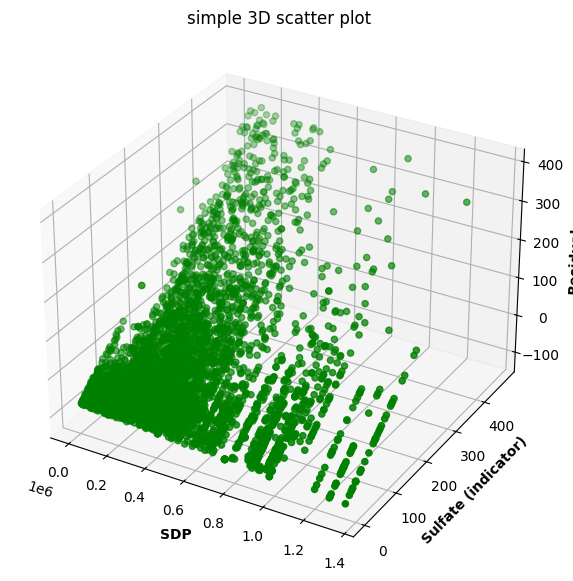

In [631]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(X['SDP_NORM'],y,residuals, color = "green")
plt.title("simple 3D scatter plot")
plt.title("simple 3D scatter plot")
ax.set_xlabel('SDP', fontweight ='bold') 
ax.set_ylabel('Sulfate (indicator)', fontweight ='bold') 
ax.set_zlabel('Residuals', fontweight ='bold')
 
# show plot
plt.show()

c) histogram

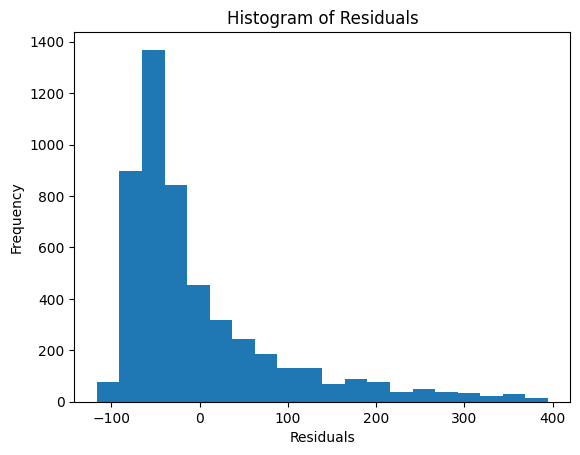

Sum of residuals: -7.050005024211714e-11


In [632]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
print("Sum of residuals:", sum(residuals))

d) Kuznet

In [633]:
merged_data = pd.read_csv("regionwise_data.csv")
merged_data.dropna(subset=['sulfate', 'SDP_NORM'], inplace=True)
X = merged_data['SDP_NORM']
print("data points before preprocessing:",len(X))
merged_data=preprocessing(merged_data,['sulfate', 'ginivalue'],3)
X = merged_data['SDP_NORM']
print("data points after preprocessing:",len(X))
X = merged_data[['SDP_NORM', 'ginivalue']]
X['SDP_sq'] = X['SDP_NORM'] ** 2
X['SDP_cube'] = X['SDP_NORM'] ** 3
X = sm.add_constant(X)
y = merged_data['sulfate']

# Refit OLS model
model = sm.OLS(y, X,missing='drop').fit()

# Calculate MSE
y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE) after preprocessing:", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())


data points before preprocessing: 5485
data points after preprocessing: 5225
Mean Squared Error (MSE) after preprocessing: 8136.434808758155
R-squared: 0.029679049983915462
F-statistic: 79.8622347654337

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     79.86
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           6.86e-35
Time:                        21:38:55   Log-Likelihood:                -30937.
No. Observations:                5225   AIC:                         6.188e+04
Df Residuals:                    5222   BIC:                         6.190e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                       

C:\Users\anous\AppData\Local\Temp\ipykernel_21076\3803195681.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_sq'] = X['SDP_NORM'] ** 2
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\3803195681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_cube'] = X['SDP_NORM'] ** 3


Creating region-wise kuznet curves

In [634]:
merged_data = pd.read_csv("merged_data.csv")
north_states = ['CHANDIGARH', 'DELHI', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'PUNJAB', 'RAJASTHAN']
merged_data['north'] = merged_data['state'].apply(lambda x: 1 if x in north_states else None)

ne_states = ['ARUNACHAL PRADESH', 'ASSAM', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'TRIPURA']
merged_data['northeast'] = merged_data['state'].apply(lambda x: 1 if x in ne_states else None)

east_states = ['ANDAMAN & NICOBAR ISLANDS', 'BIHAR', 'JHARKHAND', 'ORISSA', 'SIKKIM', 'WEST BENGAL']
merged_data['east'] = merged_data['state'].apply(lambda x: 1 if x in east_states else None)

central_states = ['CHHATTISGARH', 'MADHYA PRADESH', 'UTTAR PRADESH', 'UTTARAKHAND']
merged_data['central'] = merged_data['state'].apply(lambda x: 1 if x in central_states else None)

west_states = ['THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU', 'GOA', 'GUJARAT', 'MAHARASHTRA']
merged_data['west'] = merged_data['state'].apply(lambda x: 1 if x in west_states else None)

south_states = ['ANDHRA PRADESH', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'PONDICHERRY', 'TAMIL NADU','TELANGANA']
merged_data['south'] = merged_data['state'].apply(lambda x: 1 if x in south_states else None)

merged_data.to_csv("regionwise_data.csv", index=False)

1) north

In [635]:
merged_data = pd.read_csv("regionwise_data.csv")
print("North Region")
merged_data.dropna(subset=['sulfate', 'SDP_NORM','north'], inplace=True)
X = merged_data['SDP_NORM']
print("data points before preprocessing:",len(X))
merged_data=preprocessing(merged_data,['sulfate', 'ginivalue'],3)
X = merged_data['SDP_NORM']
print("data points after preprocessing:",len(X))
X = merged_data[['SDP_NORM', 'ginivalue']]
X['SDP_sq'] = X['SDP_NORM'] ** 2
X['SDP_cube'] = X['SDP_NORM'] ** 3
X = sm.add_constant(X)
y = merged_data['sulfate']

# Refit OLS model
model = sm.OLS(y, X,missing='drop').fit()

# Calculate MSE
y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE) after preprocessing:", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())


North Region
data points before preprocessing: 1370
data points after preprocessing: 1313
Mean Squared Error (MSE) after preprocessing: 23699.88446417843
R-squared: 0.08493877771498082
F-statistic: 60.79910070321342

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     60.80
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           5.62e-26
Time:                        21:38:57   Log-Likelihood:                -8476.1
No. Observations:                1313   AIC:                         1.696e+04
Df Residuals:                    1310   BIC:                         1.697e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                          

C:\Users\anous\AppData\Local\Temp\ipykernel_21076\2444548330.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_sq'] = X['SDP_NORM'] ** 2
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\2444548330.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_cube'] = X['SDP_NORM'] ** 3


north east

In [636]:
merged_data = pd.read_csv("regionwise_data.csv")
print("North-East Region")
merged_data.dropna(subset=['sulfate', 'SDP_NORM','northeast'], inplace=True)
X = merged_data['SDP_NORM']
print("data points before preprocessing:",len(X))
merged_data=preprocessing(merged_data,['sulfate',  'ginivalue'],3)
X = merged_data['SDP_NORM']
print("data points after preprocessing:",len(X))
X = merged_data[['SDP_NORM', 'ginivalue']]
X['SDP_sq'] = X['SDP_NORM'] ** 2
X['SDP_cube'] = X['SDP_NORM'] ** 3
X = sm.add_constant(X)
y = merged_data['sulfate']

# Refit OLS model
model = sm.OLS(y, X,missing='drop').fit()

# Calculate MSE
y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE) after preprocessing:", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())


North-East Region
data points before preprocessing: 390
data points after preprocessing: 386
Mean Squared Error (MSE) after preprocessing: 83.56150900765101
R-squared: 0.06367210253818978
F-statistic: 13.022369267343832

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     13.02
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           3.38e-06
Time:                        21:38:58   Log-Likelihood:                -1401.8
No. Observations:                 386   AIC:                             2810.
Df Residuals:                     383   BIC:                             2822.
Df Model:                           2                                         
Covariance Type:            nonrobust                      

C:\Users\anous\AppData\Local\Temp\ipykernel_21076\1169489526.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_sq'] = X['SDP_NORM'] ** 2
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\1169489526.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_cube'] = X['SDP_NORM'] ** 3


east

In [637]:
merged_data = pd.read_csv("regionwise_data.csv")
print("East Region")
merged_data.dropna(subset=['sulfate', 'SDP_NORM','east'], inplace=True)
X = merged_data['SDP_NORM']
print("data points before preprocessing:",len(X))
merged_data=preprocessing(merged_data,['sulfate',  'ginivalue'],3)
X = merged_data['SDP_NORM']
print("data points after preprocessing:",len(X))
X = merged_data[['SDP_NORM', 'ginivalue']]
X['SDP_sq'] = X['SDP_NORM'] ** 2
X['SDP_cube'] = X['SDP_NORM'] ** 3
X = sm.add_constant(X)
y = merged_data['sulfate']

# Refit OLS model
model = sm.OLS(y, X,missing='drop').fit()

# Calculate MSE
y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE) after preprocessing:", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())

East Region
data points before preprocessing: 433
data points after preprocessing: 420
Mean Squared Error (MSE) after preprocessing: 289.70662577039116
R-squared: -0.16262345980420134
F-statistic: -29.16420710699085

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                      -0.163
Model:                            OLS   Adj. R-squared:                 -0.168
Method:                 Least Squares   F-statistic:                    -29.16
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               1.00
Time:                        21:38:59   Log-Likelihood:                -1786.4
No. Observations:                 420   AIC:                             3579.
Df Residuals:                     417   BIC:                             3591.
Df Model:                           2                                         
Covariance Type:            nonrobust                          

C:\Users\anous\AppData\Local\Temp\ipykernel_21076\2653061445.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_sq'] = X['SDP_NORM'] ** 2
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\2653061445.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_cube'] = X['SDP_NORM'] ** 3


central

In [638]:
merged_data = pd.read_csv("regionwise_data.csv")
print("Central Region")
merged_data.dropna(subset=['sulfate', 'SDP_NORM','central'], inplace=True)
X = merged_data['SDP_NORM']
print("data points before preprocessing:",len(X))
merged_data=preprocessing(merged_data,['sulfate',  'ginivalue'],3)
X = merged_data['SDP_NORM']
print("data points after preprocessing:",len(X))
X = merged_data[['SDP_NORM', 'ginivalue']]
X['SDP_sq'] = X['SDP_NORM'] ** 2
X['SDP_cube'] = X['SDP_NORM'] ** 3
X = sm.add_constant(X)
y = merged_data['sulfate']

# Refit OLS model
model = sm.OLS(y, X,missing='drop').fit()

# Calculate MSE
y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE) after preprocessing:", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())

Central Region
data points before preprocessing: 1447
data points after preprocessing: 1396
Mean Squared Error (MSE) after preprocessing: 939.0211531324352
R-squared: 0.026312551293958597
F-statistic: 18.821945379492103

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     18.82
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           8.59e-09
Time:                        21:39:00   Log-Likelihood:                -6758.5
No. Observations:                1396   AIC:                         1.352e+04
Df Residuals:                    1393   BIC:                         1.354e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                      

C:\Users\anous\AppData\Local\Temp\ipykernel_21076\3156119397.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_sq'] = X['SDP_NORM'] ** 2
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\3156119397.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_cube'] = X['SDP_NORM'] ** 3


west

In [639]:
merged_data = pd.read_csv("regionwise_data.csv")
print("West Region")
merged_data.dropna(subset=['sulfate', 'SDP_NORM','west'], inplace=True)
X = merged_data['SDP_NORM']
print("data points before preprocessing:",len(X))
merged_data=preprocessing(merged_data,['sulfate', 'ginivalue'],3)
X = merged_data['SDP_NORM']
print("data points after preprocessing:",len(X))
X = merged_data[['SDP_NORM', 'ginivalue']]
X['SDP_sq'] = X['SDP_NORM'] ** 2
X['SDP_cube'] = X['SDP_NORM'] ** 3
X = sm.add_constant(X)
y = merged_data['sulfate']

# Refit OLS model
model = sm.OLS(y, X,missing='drop').fit()

# Calculate MSE
y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE) after preprocessing:", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())

West Region
data points before preprocessing: 862
data points after preprocessing: 821
Mean Squared Error (MSE) after preprocessing: 3827.620720447964
R-squared: -0.02336472749937135
F-statistic: -9.337993865191903

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                      -0.023
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    -9.338
Date:                Sat, 27 Apr 2024   Prob (F-statistic):               1.00
Time:                        21:39:01   Log-Likelihood:                -4551.6
No. Observations:                 821   AIC:                             9109.
Df Residuals:                     818   BIC:                             9123.
Df Model:                           2                                         
Covariance Type:            nonrobust                           

C:\Users\anous\AppData\Local\Temp\ipykernel_21076\2266707559.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_sq'] = X['SDP_NORM'] ** 2
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\2266707559.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_cube'] = X['SDP_NORM'] ** 3


south

In [640]:
merged_data = pd.read_csv("regionwise_data.csv")
print("South Region")
merged_data.dropna(subset=['sulfate', 'SDP_NORM','south'], inplace=True)
X = merged_data['SDP_NORM']
print("data points before preprocessing:",len(X))
merged_data=preprocessing(merged_data,['sulfate', 'ginivalue'],3)
X = merged_data['SDP_NORM']
print("data points after preprocessing:",len(X))
X = merged_data[['SDP_NORM', 'ginivalue']]
X['SDP_sq'] = X['SDP_NORM'] ** 2
X['SDP_cube'] = X['SDP_NORM'] ** 3
X = sm.add_constant(X)
y = merged_data['sulfate']

# Refit OLS model
model = sm.OLS(y, X,missing='drop').fit()

# Calculate MSE
y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE) after preprocessing:", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())

South Region
data points before preprocessing: 947
data points after preprocessing: 908
Mean Squared Error (MSE) after preprocessing: 5588.4057429174845
R-squared: 0.02784228335568595
F-statistic: 12.95945400910434

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     12.96
Date:                Sat, 27 Apr 2024   Prob (F-statistic):           2.82e-06
Time:                        21:39:02   Log-Likelihood:                -5205.7
No. Observations:                 908   AIC:                         1.042e+04
Df Residuals:                     905   BIC:                         1.043e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                           

C:\Users\anous\AppData\Local\Temp\ipykernel_21076\808969169.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_sq'] = X['SDP_NORM'] ** 2
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\808969169.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_cube'] = X['SDP_NORM'] ** 3


In [647]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data

# Function to remove features with high VIF
def remove_high_vif_features(X, vif_threshold=5):
    vif = calculate_vif(X)
    while vif['VIF'].max() > vif_threshold:
        # print(vif['VIF'].max())
        remove_feature = vif.loc[vif['VIF'].idxmax(), 'feature']
        X.drop(columns=remove_feature, inplace=True)
        vif = calculate_vif(X)
    return X

merged_data = pd.read_csv("regionwise_data.csv")

# Dropping rows with missing values in specified columns
merged_data.dropna(subset=['sulfate', 'SDP_NORM','east'], inplace=True)

print("DATA POINTS BEFORE MULTICOLLINERITY" , len(merged_data['SDP_NORM']))

# Preprocessing
merged_data = preprocessing(merged_data, ['sulfate','SDP_NORM', 'ginivalue'], 3)
# print(len(merged_data['SDP_NORM']))
# Creating features
X = merged_data[['SDP_NORM', 'ginivalue']]
X['SDP_sq'] = X['SDP_NORM'] ** 2
X['SDP_cube'] = X['SDP_NORM'] ** 3
X = sm.add_constant(X)
y = merged_data['sulfate']
# print(X.shape)
# print(X.head())
# Remove features with high VIF
X = remove_high_vif_features(X)
# print(X.shape)
# print(X.head())
print("DATA POINTS AFTER MULTICOLLINERITY" , len(X))
# Fit OLS model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Calculate MSE
mse = model.mse_resid
print("Mean Squared Error (MSE):", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())

DATA POINTS BEFORE MULTICOLLINERITY 433
DATA POINTS AFTER MULTICOLLINERITY 420
Mean Squared Error (MSE): 247.12309644685243
R-squared: 0.015352560818777117
F-statistic: 3.250918860233681

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.251
Date:                Sat, 27 Apr 2024   Prob (F-statistic):             0.0397
Time:                        21:46:37   Log-Likelihood:                -1751.5
No. Observations:                 420   AIC:                             3509.
Df Residuals:                     417   BIC:                             3521.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
             

C:\Users\anous\AppData\Local\Temp\ipykernel_21076\3579281869.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_sq'] = X['SDP_NORM'] ** 2
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\3579281869.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_cube'] = X['SDP_NORM'] ** 3
c:\Users\anous\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_ts

In [642]:
merged_data = pd.read_csv("merged_data.csv")
years=[2001]
merged_data['2001'] = merged_data['year'].apply(lambda x: 1 if x in years else None)

merged_data.to_csv("yearwise_data.csv", index=False)

In [643]:
merged_data = pd.read_csv("yearwise_data.csv")
print("Year 2001")
merged_data.dropna(subset=['sulfate', 'SDP_NORM','2001'], inplace=True)
X = merged_data['SDP_NORM']
print("data points before preprocessing:",len(X))
merged_data=preprocessing(merged_data,['sulfate', 'ginivalue'],3)
X = merged_data['SDP_NORM']
print("data points after preprocessing:",len(X))
X = merged_data[['SDP_NORM', 'ginivalue']]
X['SDP_sq'] = X['SDP_NORM'] ** 2
X['SDP_cube'] = X['SDP_NORM'] ** 3
X = sm.add_constant(X)
y = merged_data['sulfate']

# Refit OLS model
model = sm.OLS(y, X,missing='drop').fit()

# Calculate MSE
y_pred = model.predict(X)
mse = ((y - y_pred) ** 2).mean()
print("Mean Squared Error (MSE) after preprocessing:", mse)

print("R-squared:", model.rsquared)
print("F-statistic:", model.fvalue)
print("\nSummary:")
print(model.summary())

Year 2001
data points before preprocessing: 245
data points after preprocessing: 232
Mean Squared Error (MSE) after preprocessing: 6135.3561228905155
R-squared: 0.03403511967438666
F-statistic: 4.034330110845891

Summary:
                            OLS Regression Results                            
Dep. Variable:                sulfate   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.034
Date:                Sat, 27 Apr 2024   Prob (F-statistic):             0.0190
Time:                        21:39:05   Log-Likelihood:                -1340.9
No. Observations:                 232   AIC:                             2688.
Df Residuals:                     229   BIC:                             2698.
Df Model:                           2                                         
Covariance Type:            nonrobust                              

C:\Users\anous\AppData\Local\Temp\ipykernel_21076\2033885378.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_sq'] = X['SDP_NORM'] ** 2
C:\Users\anous\AppData\Local\Temp\ipykernel_21076\2033885378.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['SDP_cube'] = X['SDP_NORM'] ** 3
